<a href="https://colab.research.google.com/github/medamchan/CIS5680-HW6-Sentiment-Analysis-and-Word-Cloud/blob/main/HW6_Sentiment_Analysis_and_Word_Cloud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Requirements for Sentiment Analysis with python **
1. **Create a Twitter developer account and use data source from Twitter**
2. **Use UCM as the search keyword**
3. **Use git to push a Jupitor Notebook with a readme file to GitHub**
4. **Submit the github link to Blackboard.**


**Step 1-Install Required Libraries**

In [2]:
# Install Libraries
!pip install textblob
!pip install tweepy
!pip install pycountry
!pip install wordcloud
!pip install langdetect

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 30.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for pycountry: filename=pycountry-22.3.5-py2.py3-none-any.whl size=10681847 sha256=a44636dda626c95c74d938a608eda0c330c3bb391d3390b14cf649e01aa0be3c
  Stored in directory: /root/.cache/pip/wheels/03/57/cc/290c5252ec97a6d78d36479a3c5e5ecc76318afcb241ad9dbe
Successfully built pycountry
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/publ

In [3]:
# Import Libraries

from textblob import TextBlob
import sys
import tweepy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import nltk
import pycountry
import re
import string
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from langdetect import detect
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

**Step 2: Authentication for Twitter API**

In [8]:
# Authentication
consumerKey = "2CJbp8m7Rg26LtZEKAeVXWceG"
consumerSecret = "IbULWKlS0uvhLnMTcFkzvMjDfZUcBM6eVbdLYMUbNafhieX8Y6"
accessToken = "1119095264961126402-8QDK0FvTjGmV7w1hUtGsTyCyH77bNE"
accessTokenSecret = "unheMaBnZsHrcBt3mK1bE8Ib4wtE3tPtAwSA65Y0zWIK0"

auth = tweepy.OAuthHandler(consumerKey, consumerSecret)
auth.set_access_token(accessToken, accessTokenSecret)
api = tweepy.API(auth)

**Step 3: Getting Tweets With UCM Keyword**

In [11]:
#Sentiment Analysis
def percentage(part,whole):
    return 100 * float(part)/float(whole) 

keyword = input("Please enter keyword or hashtag to search: ")
noOfTweet = int(input ("Please enter how many tweets to analyze: "))

tweets = tweepy.Cursor(api.search_tweets, q=keyword).items(noOfTweet)
positive  = 0
negative = 0
neutral = 0
polarity = 0
tweet_list = []
neutral_list = []
negative_list = []
positive_list = []

for tweet in tweets:
    # print(tweet.text)
    tweet_list.append(tweet.text)
    analysis = TextBlob(tweet.text)
    score = SentimentIntensityAnalyzer().polarity_scores(tweet.text)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    polarity += analysis.sentiment.polarity
    
    if neg > pos:
        negative_list.append(tweet.text)
        negative += 1

    elif pos > neg:
        positive_list.append(tweet.text)
        positive += 1
    
    elif pos == neg:
        neutral_list.append(tweet.text)
        neutral += 1

positive = percentage(positive, noOfTweet)
negative = percentage(negative, noOfTweet)
neutral = percentage(neutral, noOfTweet)
polarity = percentage(polarity, noOfTweet)
positive = format(positive, '.1f')
negative = format(negative, '.1f')
neutral = format(neutral, '.1f')

Please enter keyword or hashtag to search: #ucm
Please enter how many tweets to analyze: 1000


In [12]:
#Number of Tweets (Total, Positive, Negative, Neutral)
tweet_list = pd.DataFrame(tweet_list)
neutral_list = pd.DataFrame(neutral_list)
negative_list = pd.DataFrame(negative_list)
positive_list = pd.DataFrame(positive_list)
print("total number: ",len(tweet_list))
print("positive number: ",len(positive_list))
print("negative number: ", len(negative_list))
print("neutral number: ",len(neutral_list))

total number:  1000
positive number:  109
negative number:  170
neutral number:  721


In [13]:
tweet_list[0:20]


,0
0,RT @GabyMeza8: ¡EN HONOR A STAR WARS! 🙌 Por el...
1,RT @GabyMeza8: ¡EN HONOR A STAR WARS! 🙌 Por el...
2,RT @GabyMeza8: ¡EN HONOR A STAR WARS! 🙌 Por el...
3,RT @GabyMeza8: ¡EN HONOR A STAR WARS! 🙌 Por el...
4,"RT @Multiverso_GK: Y así cierra, una de las me..."
5,"Por el #MayThe4thBeWithYou, #JamesGunn publicó..."
6,RT @GabyMeza8: ¡EN HONOR A STAR WARS! 🙌 Por el...
7,RT @GabyMeza8: ¡EN HONOR A STAR WARS! 🙌 Por el...
8,RT @GabyMeza8: ¡EN HONOR A STAR WARS! 🙌 Por el...
9,RT @GabyMeza8: ¡EN HONOR A STAR WARS! 🙌 Por el...


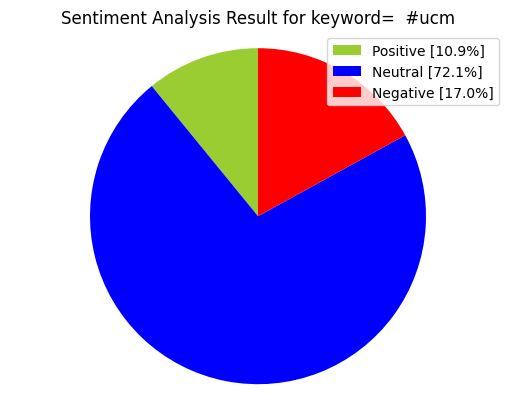

In [14]:
#Creating PieCart

labels = ['Positive ['+str(positive)+'%]' , 'Neutral ['+str(neutral)+'%]','Negative ['+str(negative)+'%]']
sizes = [positive, neutral, negative]
colors = ['yellowgreen', 'blue','red']
patches, texts = plt.pie(sizes,colors=colors, startangle=90)
plt.style.use('default')
plt.legend(labels)
plt.title("Sentiment Analysis Result for keyword=  "+keyword+"" )
plt.axis('equal')
plt.show()

In [15]:
tweet_list.drop_duplicates(inplace = True)

**Extracting text values**

In [16]:
tw_list = pd.DataFrame(tweet_list)
tw_list["text"] = tw_list[0]
tw_list

,0,text
0,RT @GabyMeza8: ¡EN HONOR A STAR WARS! 🙌 Por el...,RT @GabyMeza8: ¡EN HONOR A STAR WARS! 🙌 Por el...
4,"RT @Multiverso_GK: Y así cierra, una de las me...","RT @Multiverso_GK: Y así cierra, una de las me..."
5,"Por el #MayThe4thBeWithYou, #JamesGunn publicó...","Por el #MayThe4thBeWithYou, #JamesGunn publicó..."
17,👉🏻 Después de #DoctorStrangeInTheMultiverseOMa...,👉🏻 Después de #DoctorStrangeInTheMultiverseOMa...
23,RT @YulierSarria: En la #UCM de #Cienfuegos se...,RT @YulierSarria: En la #UCM de #Cienfuegos se...
...,...,...
973,Se estrena en cines #GuardiansOfTheGalaxyVol3 ...,Se estrena en cines #GuardiansOfTheGalaxyVol3 ...
982,✨5 COSAS QUE TAL VEZ NO SABIAS DE GAMORA✨\n\nh...,✨5 COSAS QUE TAL VEZ NO SABIAS DE GAMORA✨\n\nh...
989,And Here We Go!! 🤪 #IronMan #TonyStark #Marvel...,And Here We Go!! 🤪 #IronMan #TonyStark #Marvel...
992,"Director de #UCM Curicó, Dr. Enrique Muñoz, ac...","Director de #UCM Curicó, Dr. Enrique Muñoz, ac..."


In [17]:
#Cleaning Text (RT, Punctuation etc)

#Creating new dataframe and new features
tw_list = pd.DataFrame(tweet_list)
tw_list["text"] = tw_list[0]

#Removing RT, Punctuation etc
remove_rt = lambda x: re.sub('RT @\w+: '," ",x)
rt = lambda x: re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",x)
tw_list["text"] = tw_list.text.map(remove_rt).map(rt)
tw_list["text"] = tw_list.text.str.lower()
tw_list.head(10)

,0,text
0,RT @GabyMeza8: ¡EN HONOR A STAR WARS! 🙌 Por el...,en honor a star wars por el maythe4thbew...
4,"RT @Multiverso_GK: Y así cierra, una de las me...",y as cierra una de las mejores trilog as de...
5,"Por el #MayThe4thBeWithYou, #JamesGunn publicó...",por el maythe4thbewithyou jamesgunn public ...
17,👉🏻 Después de #DoctorStrangeInTheMultiverseOMa...,despu s de doctorstrangeinthemultiverseoma...
23,RT @YulierSarria: En la #UCM de #Cienfuegos se...,en la ucm de cienfuegos se realiz en la ma...
76,EN HONOR A STAR WARS! 🙌 Por el #MayThe4thBeWit...,en honor a star wars por el maythe4thbewit...
79,En la #UCM de #Cienfuegos se realizó en la mañ...,en la ucm de cienfuegos se realiz en la ma ...
81,Merecido homenaje en la RANF a César Nombela C...,merecido homenaje en la ranf a c sar nombela c...
114,"Por la celebracion de #MayThe4thBeWithYou, #J...",por la celebracion de maythe4thbewithyou j...
145,¡EN HONOR A STAR WARS! 🙌 Por el #MayThe4thBeWi...,en honor a star wars por el maythe4thbewi...


In [18]:
#Calculating Negative, Positive, Neutral and Compound values

tw_list[['polarity', 'subjectivity']] = tw_list['text'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))
for index, row in tw_list['text'].iteritems():
    score = SentimentIntensityAnalyzer().polarity_scores(row)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    if neg > pos:
        tw_list.loc[index, 'sentiment'] = "negative"
    elif pos > neg:
        tw_list.loc[index, 'sentiment'] = "positive"
    else:
        tw_list.loc[index, 'sentiment'] = "neutral"
    tw_list.loc[index, 'neg'] = neg
    tw_list.loc[index, 'neu'] = neu
    tw_list.loc[index, 'pos'] = pos
    tw_list.loc[index, 'compound'] = comp

tw_list.head(10)

<ipython-input-18-7d8ae4d7e06a>:4: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for index, row in tw_list['text'].iteritems():


,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound
0,RT @GabyMeza8: ¡EN HONOR A STAR WARS! 🙌 Por el...,en honor a star wars por el maythe4thbew...,0.0,0.066667,negative,0.165,0.688,0.147,-0.1027
4,"RT @Multiverso_GK: Y así cierra, una de las me...",y as cierra una de las mejores trilog as de...,0.0,0.000000,neutral,0.000,1.000,0.000,0.0000
5,"Por el #MayThe4thBeWithYou, #JamesGunn publicó...",por el maythe4thbewithyou jamesgunn public ...,0.0,0.066667,neutral,0.000,1.000,0.000,0.0000
17,👉🏻 Después de #DoctorStrangeInTheMultiverseOMa...,despu s de doctorstrangeinthemultiverseoma...,0.0,0.000000,neutral,0.000,1.000,0.000,0.0000
23,RT @YulierSarria: En la #UCM de #Cienfuegos se...,en la ucm de cienfuegos se realiz en la ma...,0.0,0.000000,neutral,0.000,1.000,0.000,0.0000
76,EN HONOR A STAR WARS! 🙌 Por el #MayThe4thBeWit...,en honor a star wars por el maythe4thbewit...,0.0,0.066667,negative,0.191,0.638,0.170,-0.1027
79,En la #UCM de #Cienfuegos se realizó en la mañ...,en la ucm de cienfuegos se realiz en la ma ...,0.0,0.000000,neutral,0.000,1.000,0.000,0.0000
81,Merecido homenaje en la RANF a César Nombela C...,merecido homenaje en la ranf a c sar nombela c...,0.0,0.000000,neutral,0.000,1.000,0.000,0.0000
114,"Por la celebracion de #MayThe4thBeWithYou, #J...",por la celebracion de maythe4thbewithyou j...,0.0,0.066667,neutral,0.000,1.000,0.000,0.0000
145,¡EN HONOR A STAR WARS! 🙌 Por el #MayThe4thBeWi...,en honor a star wars por el maythe4thbewi...,0.0,0.066667,negative,0.191,0.638,0.170,-0.1027


In [19]:
#Creating new data frames for all sentiments (positive, negative and neutral)

tw_list_negative = tw_list[tw_list["sentiment"]=="negative"]
tw_list_positive = tw_list[tw_list["sentiment"]=="positive"]
tw_list_neutral = tw_list[tw_list["sentiment"]=="neutral"]

In [20]:
#Function for count_values_in single columns

def count_values_in_column(data,feature):
    total=data.loc[:,feature].value_counts(dropna=False)
    percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
    return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])

In [21]:
#Count_values for sentiment
count_values_in_column(tw_list,"sentiment")

,Total,Percentage
neutral,162,58.27
positive,81,29.14
negative,35,12.59


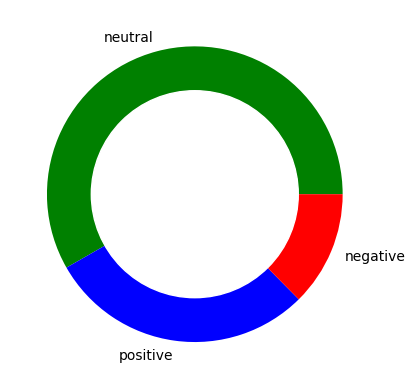

In [22]:
# create data for Pie Chart
pc = count_values_in_column(tw_list,"sentiment")
names= pc.index
size=pc["Percentage"]
 
# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(size, labels=names, colors=['green','blue','red'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [24]:
#Function to Create Wordcloud

def create_wordcloud(text):
    stopwords = set(STOPWORDS)
    wc = WordCloud(background_color="white", width=600, height=400,               
                  max_words=300,
                  stopwords=stopwords,
                  repeat=True)
    wc.generate(str(text))
    
    plt.imshow(wc)
    plt.show()

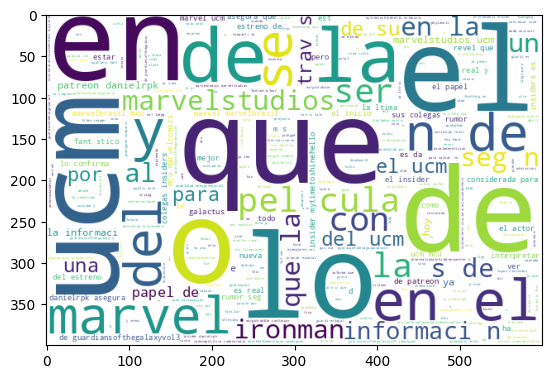

In [25]:
#Creating wordcloud for all tweets
create_wordcloud(tw_list["text"].values)

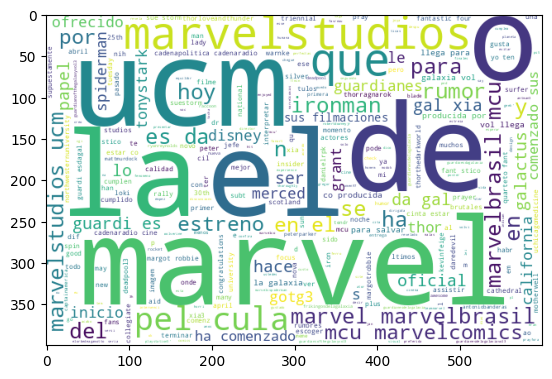

In [26]:
#Creating wordcloud for positive sentiment
create_wordcloud(tw_list_positive["text"].values)

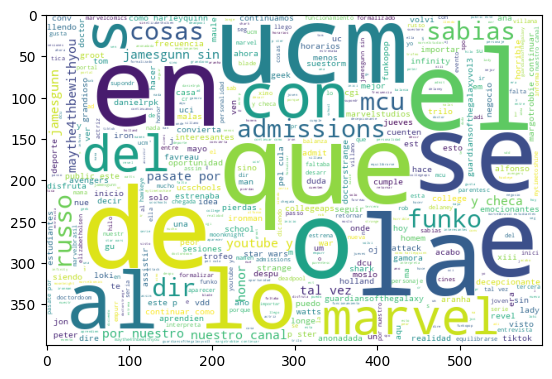

In [27]:
#Creating wordcloud for negative sentiment
create_wordcloud(tw_list_negative["text"].values)

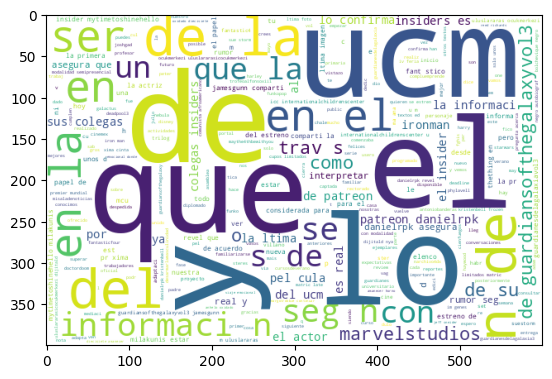

In [28]:
#Creating wordcloud for neutral sentiment
create_wordcloud(tw_list_neutral["text"].values)